In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Parsed URL from website (#4. Online Shoppers Purchasing Intention Dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
df=pd.read_csv(url)

In [13]:
print(df.describe())
print(df.info())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

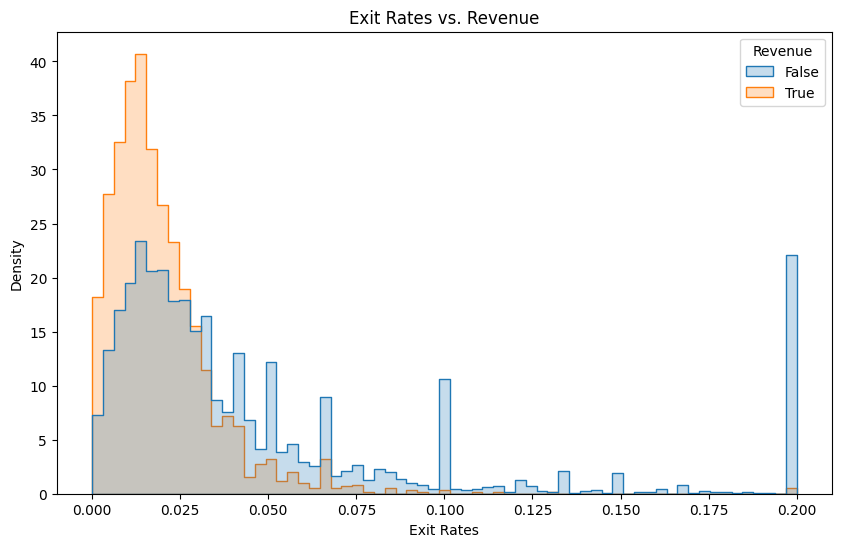

Average Exit Rate for Converting Users: 0.019555168256813416
Average Exit Rate for Non-Converting Users: 0.04737827052648245


In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ExitRates', hue='Revenue', element='step', stat='density', common_norm=False)
plt.title('Exit Rates vs. Revenue')
plt.xlabel('Exit Rates')
plt.ylabel('Density')
plt.show()

print('Average Exit Rate for Converting Users:', df[df['Revenue'] == True]['ExitRates'].mean())
print('Average Exit Rate for Non-Converting Users:', df[df['Revenue'] == False]['ExitRates'].mean())

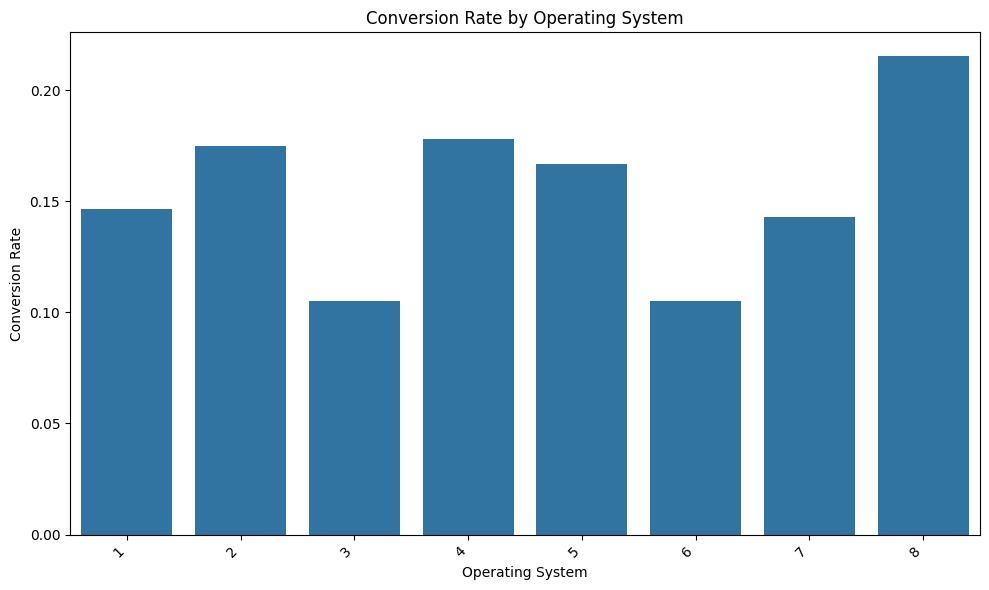

Conversion Rates by Operating System:
OS 1: 0.1466
OS 2: 0.1750
OS 3: 0.1049
OS 4: 0.1778
OS 5: 0.1667
OS 6: 0.1053
OS 7: 0.1429
OS 8: 0.2152


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os_conversion_rates = df.groupby('OperatingSystems')['Revenue'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=os_conversion_rates.index, y=os_conversion_rates.values)
plt.title('Conversion Rate by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Conversion Rates by Operating System:")
for os, conversion_rate in os_conversion_rates.items():
    print(f"OS {os}: {conversion_rate:.4f}")

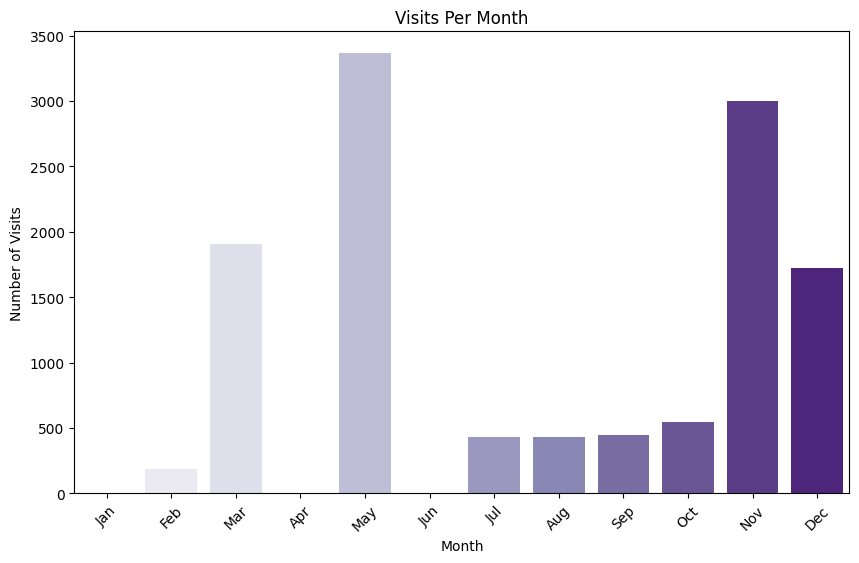

In [16]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

visits_per_month = df['Month'].value_counts().reindex(month_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=visits_per_month.index, y=visits_per_month.values, hue=visits_per_month.index, palette="Purples", legend=False)
plt.title('Visits Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-62b1f7ad4c3c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_conversion_rate = df.groupby('Month')['Revenue'].mean()


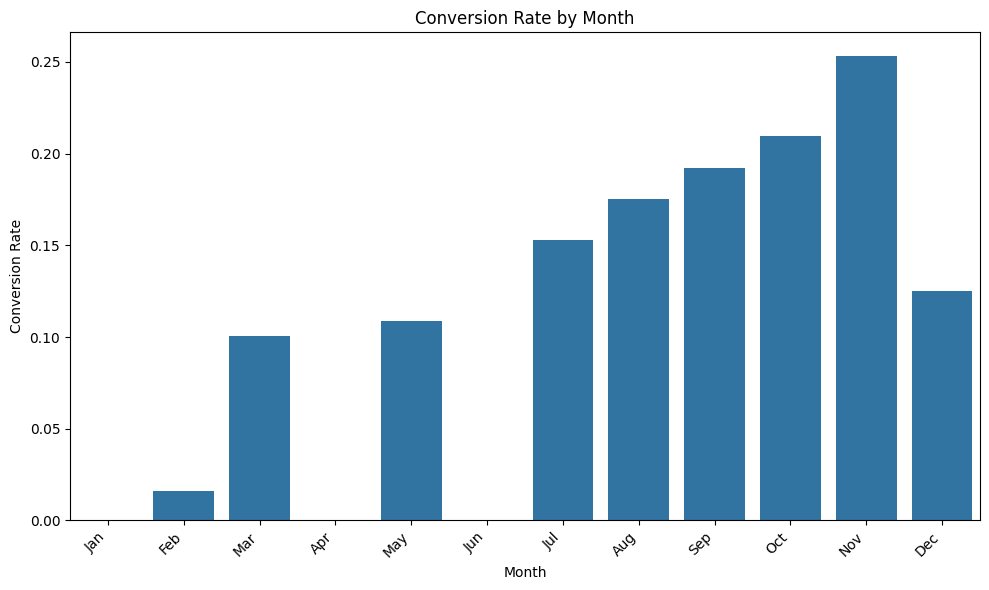

Conversion Rates by Month:
Jan: nan
Feb: 0.0163
Mar: 0.1007
Apr: nan
May: 0.1085
Jun: nan
Jul: 0.1528
Aug: 0.1755
Sep: 0.1920
Oct: 0.2095
Nov: 0.2535
Dec: 0.1251


In [17]:
monthly_conversion_rate = df.groupby('Month')['Revenue'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_conversion_rate.index, y=monthly_conversion_rate.values)
plt.title('Conversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Conversion Rates by Month:")
for month, conversion_rate in monthly_conversion_rate.items():
    print(f"{month}: {conversion_rate:.4f}")

<ipython-input-18-aaf558377770>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_weekend_conversion = df.groupby(['Month', 'Weekend'])['Revenue'].mean().reset_index()


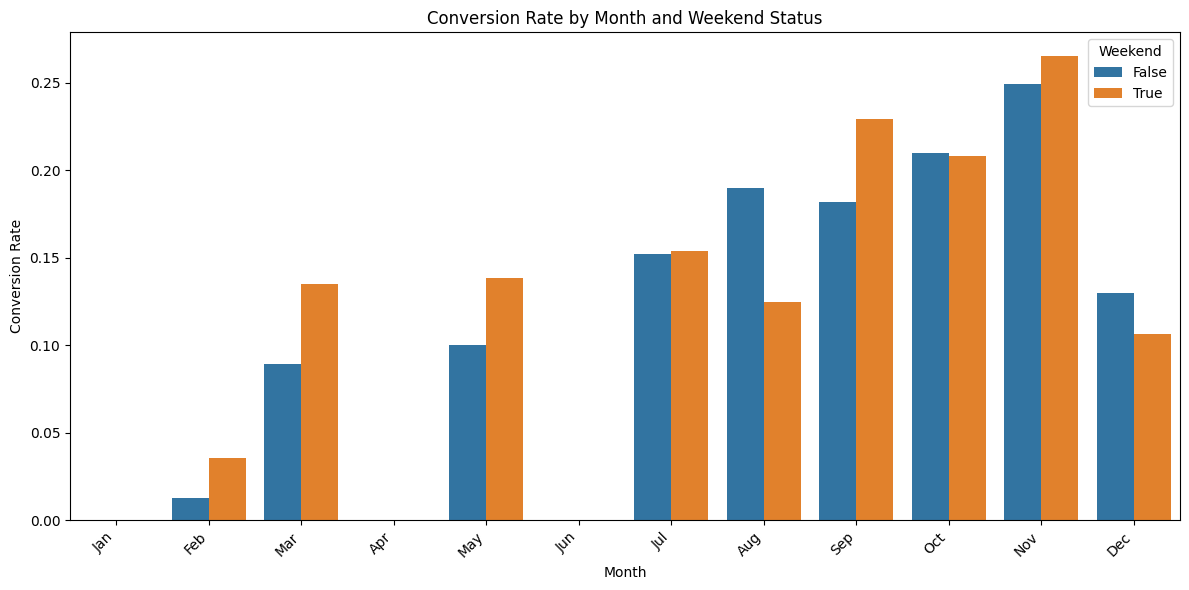

In [18]:
monthly_weekend_conversion = df.groupby(['Month', 'Weekend'])['Revenue'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Revenue', hue='Weekend', data=monthly_weekend_conversion)
plt.title('Conversion Rate by Month and Weekend Status')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Some Initial Observations (After Initial Visualizations)

- High exit rates could be related to lower conversion rates
- Different OS have a variety of conversion rates
- November has the highest number of website visits, this could be due to 'Special Days' such as Black Friday, Thanksgiving, etc.
- The site has predominantly more cases in which revenue/shopping did not occur, leading to a major imbalance in data. If considering training a model later use some form of gradient boosting and classifiers.

# Hypotheses Formulation

Based on the visualizations above, I have formulated the following two hypotheses:

### Hypothesis 1:
- Users visiting on weekends are more likely to make a purchase compared to users visiting on weekdays.

### Hypothesis 2:
- Months towards the end of the year will have a lower exit rate on average.

# Testing Hypothesis 1:
### Hypothesis 1:
- Users visiting on weekends are more likely to make a purchase compared to users visiting on weekdays.

Weekend
False    0.148911
True     0.173989
Name: Revenue, dtype: float64


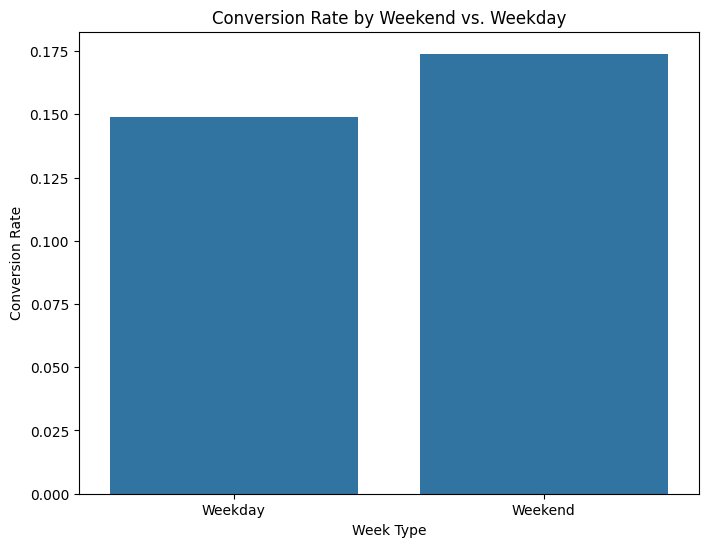

In [19]:
# Testing Hypothesis 1


# Compare Weekends to Weekdays For Revenue

weekend_conversion = df.groupby('Weekend')['Revenue'].mean()

print(weekend_conversion)


plt.figure(figsize=(8, 6))
sns.barplot(x=weekend_conversion.index, y=weekend_conversion.values)
plt.title('Conversion Rate by Weekend vs. Weekday')
plt.xlabel('Week Type')
plt.ylabel('Conversion Rate')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

In [20]:
# Testing Hypothesis 1

# Let us use T-tests!

from scipy.stats import ttest_ind

# Separate data into two groups: weekend and weekday
weekend_data = df[df['Weekend'] == True]['Revenue'].astype(int)  # Convert to 0 and 1
weekday_data = df[df['Weekend'] == False]['Revenue'].astype(int) # Convert to 0 and 1


t_statistic, p_value = ttest_ind(weekend_data, weekday_data)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 3.2541061084418708
P-value: 0.0011405626259631285


# Results and Analysis of Hypothesis Test 1

### Hypotheses

- **Null Hypothesis (H0):** There is no significant difference in the conversion rates between users visiting on weekends and users visiting on weekdays.

- **Alternative Hypothesis (HA):** Users visiting on weekends have a significantly higher conversion rate compared to users visiting on weekdays.

### Results
- **Bar Plot**:
 - Plot was constructed to compare the conversion rate for weekends versus weekdays. The reulsts show that the conversion rate for users on weekends (0.1739) is slightly higher than for users on weekdays (0.1489). This suggests a potential difference between the two groups.

- **T-Test**:
 - **T-statistic:** 3.2541
 - **P-value:** 0.0011
 - These values indicate a noticeable difference between the two groups. Additionally, as the the p-value is significantly smaller than 0.05, we will reject the null hypothesis.

### Hypothesis 1 Conclusion

- Based on the T-test results:
 - We have rejected the null hypothesis and accept the alternative hypothesis
 - There is a significant difference in conversion rates between users visiting on weekends and weekdays, with users visiting on weekends being more likely to make a purchase.

# Testing Hypothesis 2:
### Hypothesis 2:
- Months towards the end of the year will have a lower exit rate on average.

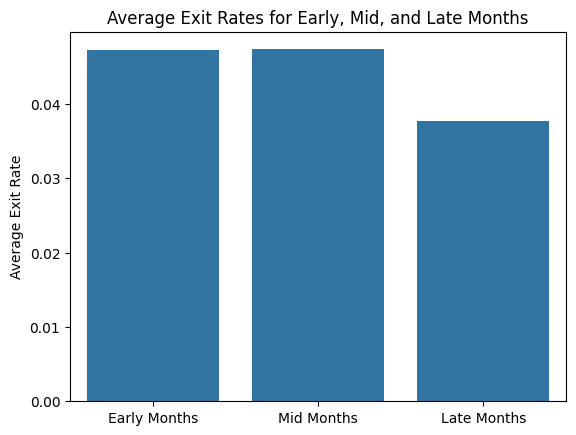

In [21]:
# Testing Hypothesis 2

early_months = ['Jan', 'Feb', 'Mar', 'Apr']
mid_months = ['May', 'Jun', 'Jul', 'Aug']
late_months = ['Sep', 'Oct', 'Nov', 'Dec']

early_data = df[df['Month'].isin(early_months)]['ExitRates']
mid_data = df[df['Month'].isin(mid_months)]['ExitRates']
late_data = df[df['Month'].isin(late_months)]['ExitRates']

# Filter months into thirds, Focus on last third of year (Sep. - Dec.)

groups = ['Early Months', 'Mid Months', 'Late Months']
mean_exit_rates = [early_data.mean(), mid_data.mean(), late_data.mean()]

sns.barplot(x=groups, y=mean_exit_rates)
plt.title('Average Exit Rates for Early, Mid, and Late Months')
plt.ylabel('Average Exit Rate')
plt.show()

In [22]:
# Testing Hypothesis 2

from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(early_data, mid_data, late_data)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 60.609383402637484
P-value: 6.4463515845531824e-27


# Results and Analysis of Hypothesis Test 2

### Hypothesis 2:
- **Null Hypothesis (H0):** There is no significant difference in the exit rates across different months of the year.  
- **Alternative Hypothesis (HA):** Months towards the end of the year (Sep-Dec) have a lower exit rate on average when compared to early (Jan-Apr) and middle (May-Aug) months.

### Results
- **Bar Plot:**  
  - A bar plot comparing the average exit rates for early, mid, and late months shows that the later months (Sep-Dec) a noticeably lower average exit rate when compared to the early and mid months. This could suggest a potential difference in the exit rates.

- **Anova Test:**
 - **F-statistic:** 60.6094  
 - **P-value:** $6.45 \times 10^{-27}$  
 - The F-statistic listed above displays a noticeable difference in the exit rates across the three month groups. Additionally, as the the p-value is significantly smaller than 0.05, we will reject the null hypothesis.

### Hypothesis 2 Conclusion
- We reject the null hypothesis and accept the alternative hypothesis.
- There is a significant difference in exit rates between the early, mid, and late months of the year, with late months (Sep-Dec) showing a lower average exit rate.


# Summary of Conclusions

## Hypothesis Test 1: Users visiting on weekends are more likely to make a purchase compared to users visiting on weekdays.

- **Conclusion:** Visiting on weekends was shown to demonstrate a higher likelihood of making a purchase, which supports the alternative hypothesis. This conclusion was primarily based on a T-test with a p-value noticeably below the 0.05 threshold, which led to the rejection of the null hypothesis.

## Hypothesis Test 2: Months towards the end of the year will have a lower exit rate on average.

- **Conclusion:** Months towards the end of the year (September-December) showed a lower average exit rate compared to earlier months, supporting the alternative hypothesis. An Anova test and a low p-value demonstrated evidence against the null hypothesis. This confirmed that there was a significant difference in exit rates across all three month groups (these being early, mid, and late).

